# Regression - How does a school's environment affect its students' ELA Assessment scores?

Predict percentage of students who will receive 3+ on the ELA assessment

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import pickle

# libraries for cleaning and preprocessing data
from sklearn.preprocessing import StandardScaler

# libraries for modeling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# libraries for evaluating models
from yellowbrick.regressor import ResidualsPlot

# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

## Data Preprocessing

**Read Data**

In [2]:
nyc_schools_ela = pd.read_csv('Data/nyc_schools_ela.csv')
nyc_schools_ela.head()

,DBN,School Name,Supportive Environment Rating,Interesting and challenging curriculum,Effective teaching and learning,Effective school assessment,Clear communication - high expectations,Teacher collaboration,"Safety, inclusivity, social-emotional growth",Resource allocation and management,...,Strong Family-Community Ties Score,Trust Score,Borough,District,Level 1 %,Level 2 %,Level 3 %,Level 4 %,Level 3+ %,% Tested
0,01M015,P.S. 015 Roberto Clemente,4,4,3,3,3,3,4,4,...,3.80,3.99,Manhattan,1,7.462687,25.373135,46.268658,20.895523,67.164177,0.387283
1,01M019,P.S. 019 Asher Levy,3,4,4,4,4,4,4,4,...,4.10,3.55,Manhattan,1,11.956522,32.608696,39.130436,16.304348,55.434784,0.377049
2,01M020,P.S. 020 Anna Silver,2,2,2,2,3,2,3,3,...,3.64,3.12,Manhattan,1,30.143541,30.143541,28.229666,11.483253,39.712917,0.451404
3,01M034,P.S. 034 Franklin D. Roosevelt,2,2,2,2,3,3,2,3,...,3.33,2.32,Manhattan,1,33.644859,39.719627,18.224298,8.411215,26.635513,0.668750
4,01M063,The STAR Academy - P.S.63,3,4,3,4,3,4,4,4,...,4.01,3.95,Manhattan,1,6.250000,35.937500,42.187500,15.625000,57.812500,0.361582


In [3]:
nyc_schools_ela = nyc_schools_ela.drop(['Percent English Language Learners',
                                        'Percent Students with Disabilities', 'Percent Self-Contained',
                                        'Economic Need Index', 'Percent in Temp Housing',
                                        'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
                                        'Percent Hispanic', 'Percent White',
                                        'Principal experience at this school',
                                        'Percent of teachers with 3+ years of experience',
                                        'Student Attendance Rate', 'Percent of Students Chronically Absent',
                                        'Teacher Attendance Rate', 'District', 'Borough', '% Tested'], axis=1)

**Define features and target**

In [4]:
X = nyc_schools_ela.drop(['DBN', 'School Name', 'Level 1 %', 'Level 2 %',
                          'Level 3 %', 'Level 4 %', 'Level 3+ %',],
                         axis=1)
y = nyc_schools_ela['Level 3+ %']

**Encode categorical variables**

In [5]:
X = pd.get_dummies(X, drop_first=True)

**Train-test split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=220)

**Standardize variables**

In [7]:
scale = StandardScaler()
X_train_scale = pd.DataFrame(scale.fit_transform(X_train),
                             columns=X.columns)
X_test_scale = pd.DataFrame(scale.transform(X_test),
                            columns=X.columns)

## Modeling

### Multiple Linear Regression

**Scikit-learn Regression**

In [6]:
linreg = LinearRegression().fit(X_train, y_train)

In [12]:
print('Train Score:', linreg.score(X_train, y_train))
print('Test Score:', linreg.score(X_test, y_test))
print('Intercept:', linreg.intercept_)
print('Coefficients:', linreg.coef_)

Train Score: 0.8323399819412222
Test Score: 0.8232247284067848
Intercept: -123.70777957512888
Coefficients: [ 1.38792019e+00 -7.89190036e-01 -1.05442339e+00 -7.96426403e-01
  3.84445794e-01  5.64606942e-01  6.36530951e-01  3.10525808e-02
  7.88631386e-01 -3.27289163e-01  4.22441859e-01 -4.70842668e+01
 -2.72672296e+01 -1.14170193e+01  4.73503647e+00  4.70323042e-01
 -3.52120199e+01  2.46267868e+01 -6.00908258e+00  6.77063217e+00
  9.22049747e+00  2.13279964e-01  3.96004455e+00  1.00724975e+02
 -8.61864829e+00  9.77210050e+01 -1.63520161e+00  2.51495823e-01
  4.57008746e+00 -2.20506321e+00  1.23884469e+00 -2.53872886e-01
 -6.98372122e+00  4.32971320e+00  8.07880962e-01  2.95705722e+00
  5.35075639e+00]


**Statsmodels Linear Regression**

In [7]:
linreg_ols = sm.OLS(y_train,
                    sm.add_constant(X_train)).fit()

In [8]:
model_sum = linreg_ols.summary()
print(model_sum)

                            OLS Regression Results                            
Dep. Variable:             Level 3+ %   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          1.09e-294
Time:                        21:40:52   Log-Likelihood:                -3090.1
No. Observations:                 872   AIC:                             6256.
Df Residuals:                     834   BIC:                             6437.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [9]:
# Create a dataframe from our regression results
lin_table = linreg_ols.summary().tables[1]
lin_table = pd.DataFrame(lin_table.data)
lin_table.columns = lin_table.iloc[0]
lin_table.drop(0, inplace=True)
lin_table = lin_table.set_index(lin_table.columns[0])
lin_table = lin_table.astype(float)
lin_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-123.7078,74.841,-1.653,0.099,-270.607,23.191
Supportive Environment Rating,1.3879,0.752,1.845,0.065,-0.089,2.865
Interesting and challenging curriculum,-0.7892,0.844,-0.935,0.350,-2.446,0.868
Effective teaching and learning,-1.0544,0.837,-1.259,0.208,-2.698,0.589
Effective school assessment,-0.7964,0.814,-0.978,0.328,-2.395,0.802
Clear communication - high expectations,0.3844,0.817,0.470,0.638,-1.220,1.989
Teacher collaboration,0.5646,0.960,0.588,0.557,-1.319,2.449
"Safety, inclusivity, social-emotional growth",0.6365,0.864,0.736,0.462,-1.060,2.333
Resource allocation and management,0.0311,1.081,0.029,0.977,-2.090,2.152


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Ridge Regression

In [22]:
lin_l2 = RidgeCV(scoring='r2', cv=5)
lin_l2.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='r2', store_cv_values=False)

In [23]:
print('Train Score:', lin_l2.score(X_train, y_train))
print('Test Score:', lin_l2.score(X_test, y_test))

Train Score: 0.8313332084092787
Test Score: 0.8286470729206997


### SVR

In [28]:
svm_r = SVR(kernel='linear')
svm_r.fit(X_train_scale, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
print('Model Score:', svm_r.score(X_test_scale, y_test))

Model Score: 0.8110291062477624


**Tuning hyperparameters**

In [40]:
svm_grid = {'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']}

In [41]:
svm_gs = GridSearchCV(estimator=SVR(),
                      param_grid=svm_grid,
                      scoring='r2',
                      cv=5, verbose=1, n_jobs=-1)

svm_gs.fit(X_train_scale, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [42]:
print('Best params:', svm_gs.best_params_)
print('Train score: %.3f' % svm_gs.best_score_)
print('Test score: %.3f' % svm_gs.score(X_test_scale, y_test))

Best params: {'C': 1, 'kernel': 'linear'}
Train score: 0.815
Test score: 0.811


### Random Forest Regressor

In [8]:
rf_v = RandomForestRegressor(random_state=220)

rf_v.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=220, verbose=0,
                      warm_start=False)

In [9]:
print('Model Score:', rf_v.score(X_test, y_test))

Model Score: 0.3710455663165564


**Tuning hyperparameters**

In [10]:
rf_grid = {'n_estimators': [1300, 1500],
          'max_depth': [12, 13, 14],
          'min_samples_split': [2, 3],
          'min_samples_leaf': [1, 2],
          'max_features': ['sqrt']}

In [11]:
rf_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=220),
                     param_grid=rf_grid,
                     scoring='r2',
                     cv=5, verbose=1, n_jobs=-1)

rf_gs.fit(X_train, y_train)

# pickle.dump(rf_gs, open('Models/rf_ela.sav', 'wb'))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   59.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=220,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14], 'max_fe

In [12]:
# rf_gs = pickle.load(open('Models/rf_ela.sav', 'rb'))

print('Best params:', rf_gs.best_params_)
print('Train score: %.3f' % rf_gs.best_score_)
print('Test score: %.3f' % rf_gs.score(X_test, y_test))

Best params: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1500}
Train score: 0.374
Test score: 0.472


## Interpreting the Results

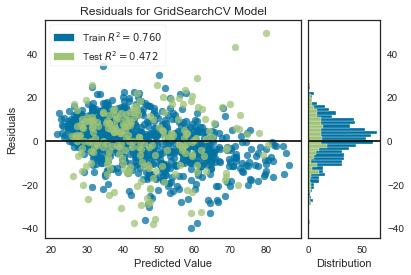

In [13]:
visualizer = ResidualsPlot(rf_gs)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [14]:
rf_feat_imp = pd.DataFrame([list(X_train.columns),
                            rf_gs.best_estimator_.feature_importances_]).T
rf_feat_imp.columns = ['Feature', 'Importance']
rf_feat_imp.sort_values('Importance', inplace=True)

In [15]:
rf_feat_imp.tail(10)

,Feature,Importance
2,Effective teaching and learning,0.0331669
8,"Identifying, tracking, and meeting goals",0.0355571
10,School decision evaluation and adjustment,0.0398957
4,Clear communication - high expectations,0.0475063
12,Effective School Leadership Score,0.079128
0,Supportive Environment Rating,0.0881825
15,Trust Score,0.0924381
11,Collaborative Teachers Score,0.11435
14,Strong Family-Community Ties Score,0.157371
13,Rigorous Instruction Score,0.192008


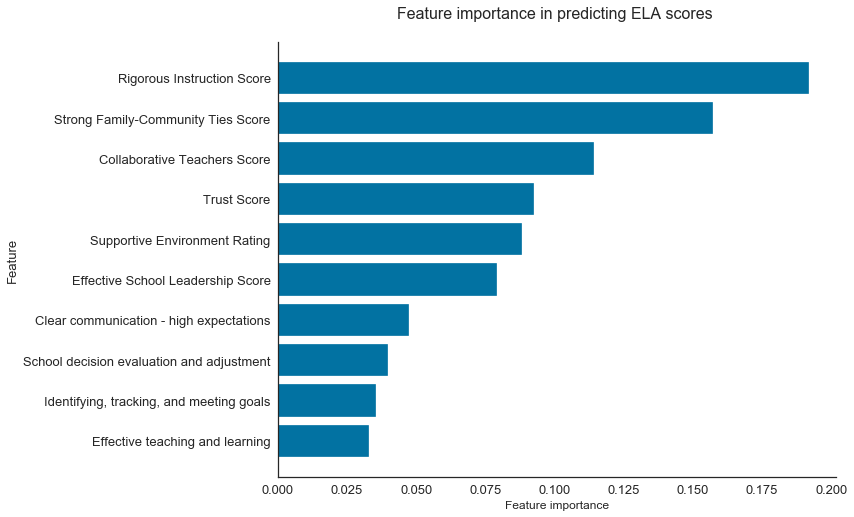

In [16]:
plt.figure(figsize=(10, 8))
n_features = rf_feat_imp.shape[1]
plt.barh(rf_feat_imp['Feature'][-10:],
         rf_feat_imp['Importance'][-10:],
         align='center')
plt.xlabel('Feature importance', fontsize=12)
plt.ylabel('Feature', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(f'Feature importance in predicting ELA scores \n', fontsize=16)
sns.despine(left=False, bottom=False)
plt.savefig('Images/ELA_feat_imp.png', bbox_inches='tight')

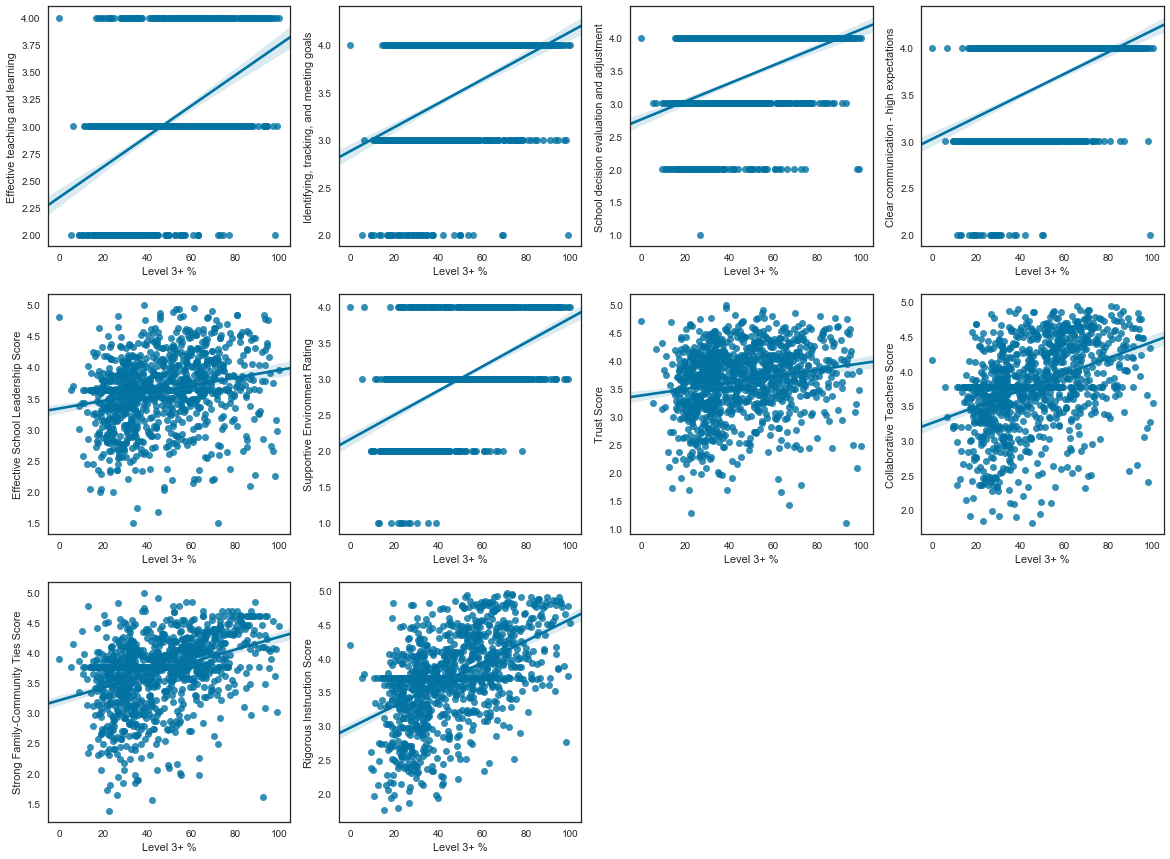

In [17]:
plt.figure(figsize=(20, 15))
for row, col in enumerate(list(rf_feat_imp['Feature'][-10:].values)):
    plt.subplot(3, 4, row+1)
    sns.regplot(nyc_schools_ela['Level 3+ %'],
                nyc_schools_ela[col])

## Summary

After running Multiple Linear Regression, Ridge Regression, SVR, and Random Forest Regressor, Random Forest Regressor resulted with the best score, an $R^2$ of 47.2%. $$R^2 = \frac{Model Variance}{Total Variance}$$

The following list shows the top 10 features in predicting a school's percentage of students receiving Level 3 or 4 on the ELA assessment. Those marked with a <font color='red'>(-)</font> has a negative correlation with the percentage of students receiving Level 3 or 4: lower values of the following result in a higher percentage of Level 3 or 4 students. Those marked with a <font color='blue'>(+)</font> has a positive correlation with the percentage of students receiving Level 3 or 4: higher values of the following result in a higher percentage of Level 3 or 4 students.

1. Effective teaching and learning
2. Identifying, tracking, and meeting goals
3. School decision evaluation and adjustment
4. Clear communication - high expectations
5. Effective school leadership <font color='blue'>(+)</font>
6. Supportive environment
7. Trust <font color='blue'>(+)</font>
8. Collaborative teachers <font color='blue'>(+)</font>
9. Strong family-community ties <font color='blue'>(+)</font>
10. Rigorous Instruction <font color='blue'>(+)</font>